<a href="https://colab.research.google.com/github/viegasgr/introDS/blob/aula1/IntroDS_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AULA 1: Data Science: dados e visualizações


In [ ]:
import pandas as pd
notas = pd.read_csv('ratings.csv') #criando um dataframe
notas.head() #mostra os 5 primeiros

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape #qtd de colunas e linhas

(100836, 4)

In [ ]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"] #redefinindo o nome das colunas na variável "notas"
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas['nota'] #cada coluna é uma 'series', uma série de valores
notas['nota'].unique() #diz quais valores existem em uma série, de forma única

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts() #diz quanto de cada valor tem em uma série e ordena do valor que mais aparece para o que menos aparece

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
media = notas['nota'].mean() #tira a média.
mediana = notas.nota.median() #tira a mediana

In [ ]:
notas.nota.head() #outra maneira de obter uma série de um dataframe

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

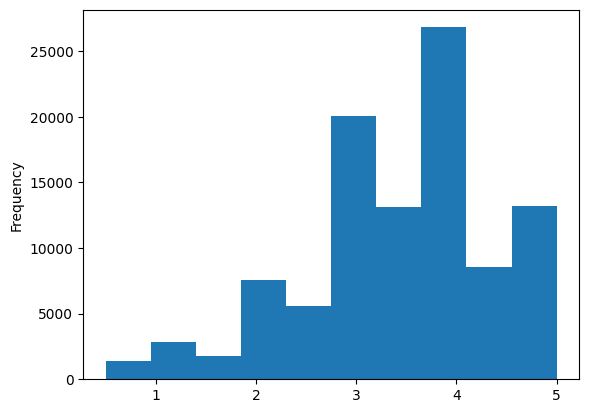

In [ ]:
notas.nota.plot(kind='hist') #plotando o histograma no plot do pandas

<Axes: >

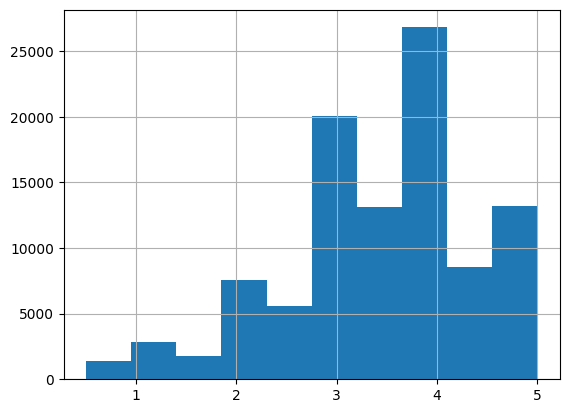

In [ ]:
notas.nota.hist() #plotando o histograma direto. achei mais feio, fica com umas linhas.

In [ ]:
notas.nota.describe() #dá várias informações sobre o dataframe

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: >

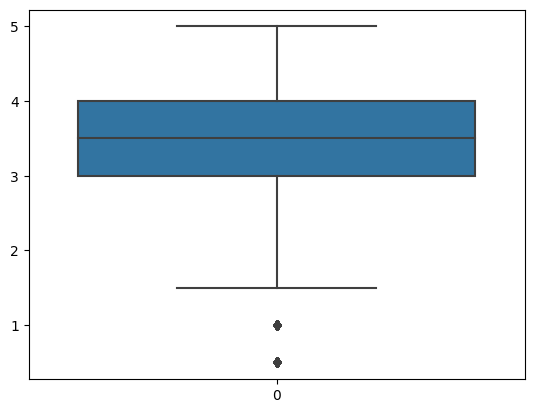

In [ ]:
import seaborn as sns #plota graficos bonitinhos

sns.boxplot(notas.nota)

### AULA 2: Análise exploratória